In [1]:
#Packages used for model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#For visuals
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
adult = pd.read_csv('../data/adult.csv')

adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
adult = adult.replace({'?': 'Unknown'})

In [4]:
#Creating a new column to hold random income
adult['random_income'] = adult['income']
 
# Generate random income value for rows that are '>50k' in income
adult.loc[adult['income'] == '>50K', 'random_income'] = np.random.uniform(50001, 500000, size=np.sum(adult['income'] == '>50K'))

# Generate random income value for rows that are '<=50k' in income
adult.loc[adult['income'] == '<=50K', 'random_income'] = np.random.uniform(1000, 50000, size=np.sum(adult['income'] == '<=50K'))

#Convert the random_income column to integer type
adult['random_income'] = adult['random_income'].astype(int)

In [5]:
adult['marital.status'] = adult['marital.status'].replace('Never-married', 'Single')

In [6]:
adult_m = adult[adult['sex'] == 'Male']
adult_f = adult[adult['sex'] == 'Female']

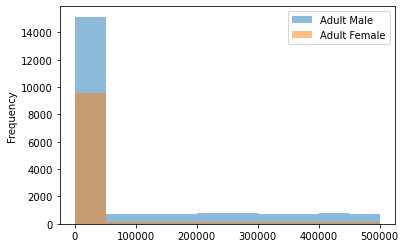

In [12]:
adult_m['random_income'].plot.hist(label='Adult Male', alpha=0.5)
adult_f['random_income'].plot.hist(label='Adult Female', alpha=0.5)
plt.legend()

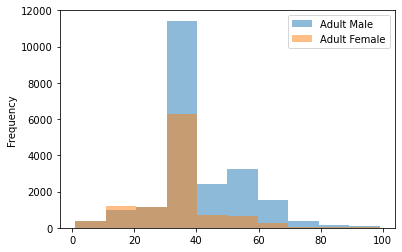

In [18]:
adult_m['hours.per.week'].plot.hist(label='Adult Male', alpha=0.5)
adult_f['hours.per.week'].plot.hist(label='Adult Female', alpha=0.5)
plt.legend()

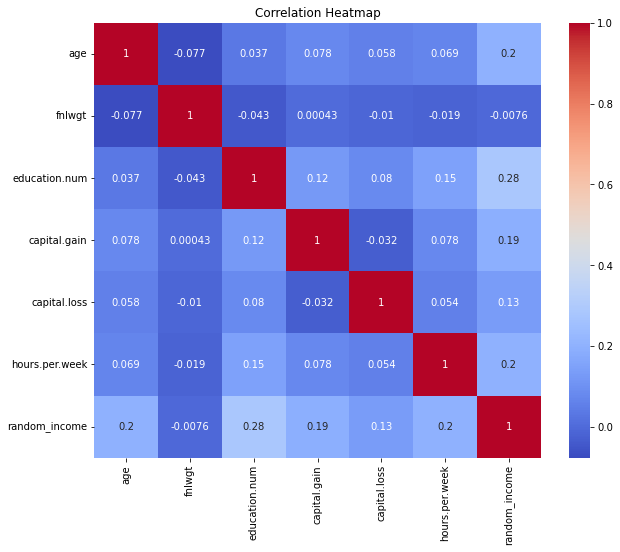

In [21]:
adult_matrix = adult.corr()
plt.figure(figsize=(10,8))
sns.heatmap(adult_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [22]:
adult.to_csv(r'../data/adultupdated.csv')
adult_m.to_csv(r'../data/adult_m.csv')
adult_f.to_csv(r'../data/adult_f.csv')